<a href="https://colab.research.google.com/github/Klu77/project-1-for-Git-tools/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
data
# y = w*x + b
x = data['YearsExperience']
y = data['Salary']

In [13]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost

In [14]:
def compute_gradient(x, y, w, b):
  w_gradient = (2*x*(w*x+b -y)).mean()
  b_gradient = (2*(w*x+b -y)).mean()
  return w_gradient, b_gradient

In [15]:
"""
w_gradient = 2*x*(w*x+b -y)
b_gradient = 2*(w*x+b -y)
"""

'\nw_gradient = 2*x*(w*x+b -y)\nb_gradient = 2*(w*x+b -y)\n'

In [16]:
# 假设你有 w 和 b 的初始值
w = 0
b = 0
#num_iterations = 20
learning_rate = 0.01

def gradient_descent(
    x, y, w_init, b_init, learning_rate,
    cost_function, gradient_function,
    run_inter, p_inter
):
  w = w_init
  b = b_init
  #建立列表c_hist, w_hist and b_hist，分别存储每次迭代计算中的cost, w and b
  c_hist = []
  w_hist = []
  b_hist = []

  for i in range(run_inter):
    # 对于数据集中的每个点计算梯度
    #w_gradient = 2 * x * (w * x + b - y)
    #b_gradient = 2 * (w * x + b - y)

    #可以把2删掉 learning_rate  = 0.002
    w_gradient = x * (w * x + b - y)
    b_gradient = w * x + b - y

    # 计算平均梯度
    w_gradient = w_gradient.mean()
    b_gradient = b_gradient.mean()
    '''
    梯度下降是一种寻找函数最小值（或最大值）的优化算法，常用于机器学习和深度学习中的模型训练。当你使用梯度下降来训练模型时，
    你的目标是找到一组参数（在线性回归中是 w 和b），使得损失函数的值最小。计算平均梯度是一种通用的做法，
    不仅适用于简单的线性回归模型，也适用于更复杂的模型和损失函数。这种方法为各种类型的模型提供了一种稳健的参数更新策略
    注释也要注意缩进
    '''
    # 更新 w 和 b
    w = w - learning_rate * w_gradient
    b = b - learning_rate * b_gradient

    cost = compute_cost(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_inter ==0: # 每隔inter打印一次，即不是每次都打印
      print(
           f"interation{i:8} : Cost {cost:.2f}, w: {w:.2f}, b: {b:.2f}"
          ) #i;5 是为了为了对其输出 :.2f是为了小数点位数
  return w, b, w_hist, b_hist, c_hist


这句话使用了 Python 3.6+ 中引入的 f-string（格式化字符串字面值）功能来构造字符串。f-string 提供了一种快速而简洁的方式来嵌入表达式到字符串字面值中。语法上，f-string 使用一对大括号 `{}` 来标记那些需要被 Python 表达式替换的地方，而字符串需要以 `f` 或 `F` 为前缀。

以下是这句话的组成部分：

- `f"`：这是 f-string 的开始，意味着该字符串将被格式化。
- `iteration{i}`：`{i}` 会被替换为变量 `i` 的值。如果 `i` 的值是 1，则这部分会显示为 "iteration1"。
- `: Cost{cost}`：类似地，`{cost}` 会被替换为变量 `cost` 的值。如果 `cost` 的值是 300，则这部分会显示为 ": Cost300"。
- `, w:{w}`：`{w}` 会被替换为变量 `w` 的值。
- `, b:{b}`：`{b}` 会被替换为变量 `b` 的值。
- `"`：字符串的结尾。

当这个 f-string 被 Python 解释器处理时，大括号里的表达式会被求值，然后它们的结果会被转换为字符串并插入到最终的字符串中。例如，如果 `i` 是 1，`cost` 是 300.0，`w` 是 0.5，而 `b` 是 1，那么这个 f-string 将会生成并打印出如下字符串：

```
iteration1 : Cost300.0, w:0.5, b:1
```

f-string 是一种非常有用的特性，因为它可以在不牺牲可读性的情况下使字符串格式化变得非常简洁和直观。

在批量梯度下降中，计算平均梯度是为了基于整个数据集对模型参数进行一次更新，这种方法考虑了所有数据点对损失函数的贡献。平均梯度是对每个数据点计算的梯度的平均值，它指示了在参数空间中减少损失函数的整体方向。

计算平均梯度的理由有几个：

1. **稳定性**：使用整个数据集的平均梯度来更新参数可以提供一个稳定的梯度估计，因为它减少了单个数据点可能引起的高方差。

2. **准确性**：当你考虑整个数据集时，平均梯度能更准确地代表总体的损失梯度，而不是仅仅基于单个样本或小批样本的梯度。

3. **全局最优**：批量梯度下降旨在寻找全局最优解，而非只是局部最优。平均梯度有助于指导模型参数朝向损失函数的全局最小值移动。

4. **效率**：尽管计算整个数据集的梯度比单个数据点的计算成本要高，但这种方法在每次迭代中只需要一次参数更新，从而可以在较少的迭代次数内收敛。

然而，值得注意的是，批量梯度下降也有其缺点。当数据集非常大时，计算整个数据集的梯度可能会非常耗时，并且对内存的要求也会很高。在这种情况下，通常会使用随机梯度下降（SGD）或小批量梯度下降（Mini-batch GD），这两种方法只考虑一个或一小部分样本来计算梯度，可以更快地进行迭代，虽然可能会增加收敛到最小值的迭代次数。

In [ ]:
w_init = -100
b_init = 100
learning_rate = 1.0e-2
run_inter = 9000
p_inter = 100

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(
    x, y, w_init, b_init, learning_rate,
    compute_cost, compute_gradient,
    run_inter, p_inter
)

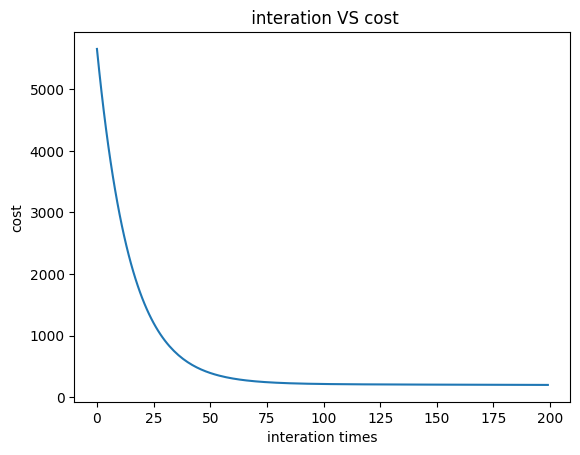

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.title(" interation VS cost")
plt.xlabel("interation times")
plt.ylabel("cost")

plt.plot(np.arange(0, 200), c_hist[:200])
plt.show()

In [19]:
print(f" Final w b = ({w_final:.2f}, {b_final:.2f})")

 Final w b = (9.14, 27.89)


In [20]:
# now let's do the prediction our eventual target

print(f"年资3.5  预测薪水：{w_final*3.5 + b_final:.1f}K")

年资3.5  预测薪水：59.9K


In [21]:
# w=-100~100 b=-100~100 的cost
import numpy as np

np.set_printoptions(precision=2) #设定小数点位数

ws = np.arange(-100, 101) #创建 ws 数组 包含从 -100 到 100 的整数（包括 -100 和 100）。np.arange 函数的起始值是 -100，结束值是 101

bs = np.arange(-100, 101)
costs = np.zeros((201, 201))
"""
这条语句创建了一个名为 costs 的二维数组（矩阵），其形状为 (201, 201)，所有元素初始化为 0。
"""

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i +1

costs

array([[543097.75, 541777.28, 540458.81, ..., 320651.35, 319726.88,
        318804.41],
       [534727.51, 533416.81, 532108.1 , ..., 314214.31, 313299.61,
        312386.9 ],
       [526422.82, 525121.88, 523822.94, ..., 307842.82, 306937.88,
        306034.94],
       ...,
       [164229.91, 164842.64, 165457.37, ..., 324557.11, 325565.84,
        326576.57],
       [168838.75, 169461.25, 170085.74, ..., 331099.15, 332117.65,
        333138.14],
       [173513.14, 174145.4 , 174779.66, ..., 337706.74, 338735.  ,
        339765.26]])

[9] [29]
when w = [9], b = [29] will be the minimum cost: [32.69]


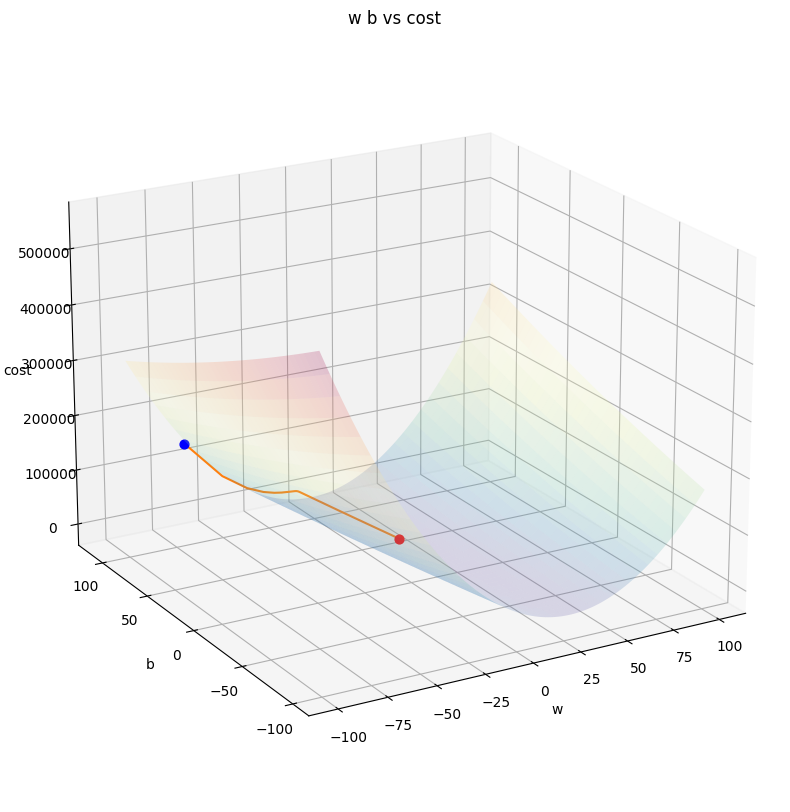

In [34]:
#把图放大一点
plt.figure(figsize=(12,10))

ax = plt.axes(projection = "3d")

ax.view_init(20, -120)  #3d图的转动角度设定 可视角度

b_grid, w_grid = np.meshgrid(bs, ws)

ax.plot_surface(w_grid, b_grid, costs, cmap= "Spectral_r", alpha = 0.2)

ax.set_title("w b vs cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

#下面是找出最小的cost的代码
#请注意，这里的w_index和b_index是下标，而不是cost最小的w和b的值，用where找出的才是cost 最小的时候的w和b的值

w_index, b_index = np.where(costs == np.min(costs)) #为什么用索引，是因为costs是一个二维数组，用np.where 会返回一个索引
#ax.scatter(ws[w_index])
#print(np.min(costs)) # print the minimum value of cost

#print(w_index, b_index)


#打印cost最小时w和b的值
print(ws[w_index], bs[b_index])

#把最小cost那个值的点设成红色，且大一点
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s =40)

#把变化的初始点也放上去，画点要用scatter
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="blue", s =40)

#把cost变化到最小点的轨迹画出来，划线要用plot
ax.plot(w_hist, b_hist, c_hist)

#print(f"when w = {ws[w_index]}, bs{[b_index]} will be the minimum cost:{costs[w_index, b_index]")
print(f"when w = {ws[w_index]}, b = {bs[b_index]} will be the minimum cost: {costs[w_index, b_index]}")
plt.show()